# **Libraries import**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2 as cv
import warnings
warnings.filterwarnings("ignore")

In [22]:
import kagglehub
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

# **Data installation**

In [23]:
base_path = path
test_url = os.path.join(base_path, "chest_xray", "test")
train_url = os.path.join(base_path, "chest_xray", "train")
val_url = os.path.join(base_path, "chest_xray", "val")

In [24]:
print("test_url - ", test_url, "\n", "train_url - ", train_url, "\n", "val_url - ", val_url)

test_url -  /kaggle/input/chest-xray-pneumonia/chest_xray/test 
 train_url -  /kaggle/input/chest-xray-pneumonia/chest_xray/train 
 val_url -  /kaggle/input/chest-xray-pneumonia/chest_xray/val


Function split the dataset into two parts: "X" and "y".  

In [25]:
labels = ["PNEUMONIA", "NORMAL"]
image_size = 150
def get_data(data_url):
    X = []
    y = []
    for label in labels:
        path = os.path.join(data_url, label)

        if not os.path.exists(path):
            print(f"Warning: Path {path} does not exist!")
            continue

        class_num = labels.index(label)
        for image in os.listdir(path):
            try:
                image_arr = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
                resized_arr = cv.resize(image_arr, (image_size, image_size)) # Reshaping images to preferred size(зачем?)
                #как посмотреть сколько минимальное изображение ?
                X.append(resized_arr)
                y.append(class_num)
            except Exception as e:#(что делаем тут ?)
                print(e)
    return np.array(X), np.array(y)

что такое относительный путьно и абсолютный путь к файлу ?

Take the training dataset.  

In [26]:
X_train, y_train = get_data(train_url)

Display a histogram with the number of people with pneumonia.

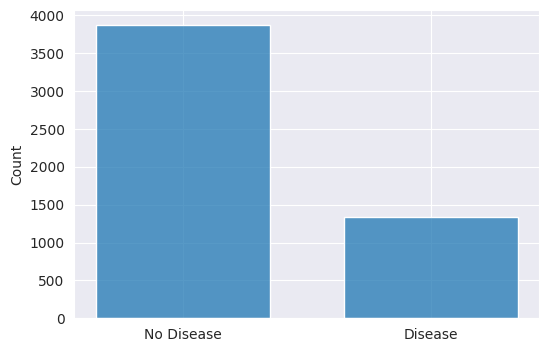

In [51]:
y_plot = pd.array(y_train).map({0: 'No Disease', 1: 'Disease'})
plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.histplot(data = y_plot,binwidth=0.5, shrink=0.7)
plt.show()